In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import LSTM
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install gtts
! pip install pydub
from gtts import gTTS
import math
import librosa
import os
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import words
import json
import random
import time

In [3]:
with open('/content/drive/My Drive/Capstone_LyricsGen/Baseline/finalData/trueSongGood_100.json','r') as file:
  truth = json.load(file)
  file.close()
with open('/content/drive/My Drive/Capstone_LyricsGen/Baseline/finalData/testSongGood_100.json','r') as file:
  test = json.load(file)
  file.close()

In [ ]:
truth[0]

[{'duration': 0.361, 'pitch': 'A4', 'text': 'play'},
 {'duration': 0.09, 'pitch': 'A4', 'text': "in'"},
 {'duration': 0.18, 'pitch': 'A4', 'text': 'in'},
 {'duration': 0.18, 'pitch': 'G#4', 'text': 'a'},
 {'duration': 0.18, 'pitch': 'F#4', 'text': 'trav'},
 {'duration': 0.09, 'pitch': 'F#4', 'text': 'e'},
 {'duration': 0.18, 'pitch': 'A#4', 'text': "lin'"},
 {'duration': 0.361, 'pitch': 'F#4', 'text': 'band.'},
 {'duration': 0.18, 'pitch': 'D#4', 'text': 'yeah!'},
 {'duration': 0.271, 'pitch': 'C#4', 'text': '-'}]

Training Data

In [14]:
import librosa

# Define the vocabulary
vocab = ['<PAD>', '<START>', '<END>']
for line in truth:
  for syllable in line:
    vocab.append(syllable['text'])
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for idx, word in enumerate(vocab)}

def note_to_freq(note):
      # Implement your logic to map notes to frequencies
      # For simplicity, assuming equal temperament here
      return librosa.note_to_hz(note)

def create_training_data(songs):
    X, y = [], []
    for line in songs:
      for i in line:
        X.append([i['duration'], note_to_freq(i['pitch'])])
        y.append(word2idx[i['text']])
    return np.array(X), np.array(y)

X_train, y_train = create_training_data(truth)

In [15]:
X_train.shape

(674, 2)

LSTM model

In [6]:
# model = Sequential()
# model.add(Embedding(input_dim=len(vocab), output_dim=32, input_length=2))  # Assuming 2 features (duration, pitch)
# model.add(LSTM(128))
# model.add(Dense(len(vocab), activation='softmax'))

# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
674/674 - 12s - loss: 6.4197 - accuracy: 0.0579 - 12s/epoch - 19ms/step
Epoch 2/50
674/674 - 4s - loss: 5.8288 - accuracy: 0.0608 - 4s/epoch - 7ms/step
Epoch 3/50
674/674 - 4s - loss: 5.6378 - accuracy: 0.0608 - 4s/epoch - 5ms/step
Epoch 4/50
674/674 - 3s - loss: 5.5355 - accuracy: 0.0608 - 3s/epoch - 5ms/step
Epoch 5/50
674/674 - 3s - loss: 5.3328 - accuracy: 0.0653 - 3s/epoch - 4ms/step
Epoch 6/50
674/674 - 3s - loss: 5.0703 - accuracy: 0.0564 - 3s/epoch - 5ms/step
Epoch 7/50
674/674 - 3s - loss: 4.8412 - accuracy: 0.0519 - 3s/epoch - 4ms/step
Epoch 8/50
674/674 - 2s - loss: 4.6367 - accuracy: 0.0593 - 2s/epoch - 3ms/step
Epoch 9/50
674/674 - 2s - loss: 4.4567 - accuracy: 0.0638 - 2s/epoch - 3ms/step
Epoch 10/50
674/674 - 2s - loss: 4.3057 - accuracy: 0.0564 - 2s/epoch - 3ms/step
Epoch 11/50
674/674 - 2s - loss: 4.1854 - accuracy: 0.0623 - 2s/epoch - 3ms/step
Epoch 12/50
674/674 - 2s - loss: 4.1031 - accuracy: 0.0816 - 2s/epoch - 3ms/step
Epoch 13/50
674/674 - 3s - loss: 4

RNN model

In [16]:
# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(vocab), output_dim=32, input_length=X_train.shape[1]))
model.add(SimpleRNN(128, activation='relu'))
model.add(Dense(len(vocab), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)


Epoch 1/50
674/674 - 5s - loss: 6.3583 - accuracy: 0.0519 - 5s/epoch - 7ms/step
Epoch 2/50
674/674 - 3s - loss: 5.6438 - accuracy: 0.0608 - 3s/epoch - 5ms/step
Epoch 3/50
674/674 - 4s - loss: 5.1823 - accuracy: 0.0638 - 4s/epoch - 6ms/step
Epoch 4/50
674/674 - 3s - loss: 4.6862 - accuracy: 0.0712 - 3s/epoch - 4ms/step
Epoch 5/50
674/674 - 3s - loss: 4.2604 - accuracy: 0.0697 - 3s/epoch - 4ms/step
Epoch 6/50
674/674 - 3s - loss: 3.9714 - accuracy: 0.0831 - 3s/epoch - 4ms/step
Epoch 7/50
674/674 - 4s - loss: 3.7838 - accuracy: 0.0875 - 4s/epoch - 5ms/step
Epoch 8/50
674/674 - 4s - loss: 3.6618 - accuracy: 0.0831 - 4s/epoch - 6ms/step
Epoch 9/50
674/674 - 3s - loss: 3.5765 - accuracy: 0.0935 - 3s/epoch - 4ms/step
Epoch 10/50
674/674 - 3s - loss: 3.5163 - accuracy: 0.0816 - 3s/epoch - 4ms/step
Epoch 11/50
674/674 - 3s - loss: 3.4781 - accuracy: 0.0801 - 3s/epoch - 4ms/step
Epoch 12/50
674/674 - 4s - loss: 3.4456 - accuracy: 0.0875 - 4s/epoch - 6ms/step
Epoch 13/50
674/674 - 4s - loss: 3.41

In [ ]:
test[0]

[{'duration': 0.361, 'pitch': 'A4', 'text': 'ted'},
 {'duration': 0.09, 'pitch': 'A4', 'text': 'ted'},
 {'duration': 0.18, 'pitch': 'A4', 'text': 'ted'},
 {'duration': 0.18, 'pitch': 'G#4', 'text': '~'},
 {'duration': 0.18, 'pitch': 'F#4', 'text': 'to'},
 {'duration': 0.09, 'pitch': 'F#4', 'text': 'to'},
 {'duration': 0.18, 'pitch': 'A#4', 'text': '~'},
 {'duration': 0.361, 'pitch': 'F#4', 'text': 'to'},
 {'duration': 0.18, 'pitch': 'D#4', 'text': '~'},
 {'duration': 0.271, 'pitch': 'C#4', 'text': 'i'}]

# 2. Evaluation

## 2.1 Pitch Alignment: Pitch Contour Correlation


`Pitch contour of lyrics: text-to-speech, pitch extraction.`


`Pitch contour of melody: Given as {duration:, pitch:, text:}`


In [9]:
def text_to_note(syllable):
  # Specify the folder name
  output_folder = '/content/drive/My Drive/Capstone_LyricsGen/Baseline/Pitch_Extraction'
  # Create the output folder if it doesn't exist
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)
  audio_path = os.path.join(output_folder, f"{syllable}.mp3")
  try:
    y, sr = librosa.load(audio_path) # Load the audio file
  except:
    tts = gTTS(text=syllable, lang='en')
    tts.save(audio_path)
    time.sleep(2)
    y, sr = librosa.load(audio_path) # Load the audio file
  pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr) # Extract pitch
  mean_pitch = pitches.mean()
  # Define a list of note names
  note_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
  # Calculate the MIDI note number
  midi_note = 12 * (math.log2(mean_pitch / 440.0)) + 69
  octave = int(midi_note) // 12 - 1
  note_index = int(midi_note) % 12
  # Get the note name from the list and append the octave
  note_name = note_names[note_index]
  full_note_name = (note_name,octave)
  # print("Syllable:",syllable)
  # print('Pitch: '+ str(mean_pitch) +'Hz')
  # print('Assigned Note:',full_note_name)
  return full_note_name


In [10]:
def plot_melody(notes,labels):
    # print(labels)
    # print(notes)
    generated_notes = []
    for i in labels:
      generated_notes.append(text_to_note(i))
    # Create x-values (assuming an increment of 1 for each data point)
    # x = range(1, len(notes) + 1)
    # Set custom x-axis labels
    # plt.xticks(x, labels)
    # Define a mapping from note names to MIDI numbers
    note_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    note_to_midi = {note: idx + 60 for idx, note in enumerate(note_names)}
    # Convert note names to MIDI numbers
    midi_notes_ori = [note_to_midi[note[:-1]] + int(note[-1]) * 12 for note in notes]
    midi_notes_gen = [note_to_midi[note[0]] + int(note[1]) * 12 for note in generated_notes]
    # Plot the melody
    # plt.scatter(x, midi_notes_ori, marker='o', color='b')
    # plt.title('Original Melody Visualization')
    # plt.xlabel('Time')
    # plt.ylabel('MIDI Note Number')
    # plt.grid(True)
    # plt.show()
    # Create x-values (assuming an increment of 1 for each data point)
    # x = range(1, len(notes) + 1)
    # Set custom x-axis labels
    # plt.xticks(x, labels)
    # Plot the melody
    # plt.scatter(x, midi_notes_gen, marker='o', color='b')
    # plt.title('Generated Melody Visualization')
    # plt.xlabel('Time')
    # plt.ylabel('MIDI Note Number')
    # plt.grid(True)
    # plt.show()
    # Ensure both lists have the same length
    if len(midi_notes_ori) != len(midi_notes_gen):
        raise ValueError("Lists must have the same length")
    # Compute MSE
    n = len(midi_notes_ori)
    mse = sum((actual - predicted) ** 2 for actual, predicted in zip(midi_notes_ori, midi_notes_gen)) / n
    # print('MSE:',mse)
    return 10000 / mse if mse != 0 else float('inf')


## 2.2 Rhythm Alignment: Stress-Duration Rules


In [11]:
# Download the CMU Pronouncing Dictionary
nltk.download("cmudict")
# Load the CMU Pronouncing Dictionary
prondict = nltk.corpus.cmudict.dict()
# Function to determine whether a syllable is stressed
def is_stressed_syllable(word):
    # Convert the word to lowercase
    word = word.lower()

    # Check if the word exists in the CMU Pronouncing Dictionary
    if word in prondict:
        pronunciation = prondict[word][0]
        # print(pronunciation)
        # Determine if the last phoneme ends with a digit (indicating stress)
        return any(char.isdigit() for char in pronunciation[-1])
    return False


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


## Completed Evaluation Metrics

In [12]:
def evaluate_lyrics_alignment(data):
    # Initialize alignment scores
    rhythm_alignment_score = 0
    pitch_alignment_score = 0

    # Iterate through paragraphs and lines

    syllables = [entry['text'] for entry in data]
    note_durations = [entry['duration'] for entry in data]
    note_pitches = [entry['pitch'] for entry in data]

            # 1. Rhythm Alignment:

            # Calculate the average duration to determine stressed and unstressed syllables
    avg_duration = sum(note_durations) / len(note_durations)

      # Notes of longer duration should match stressed syllables
    stress_flags = [is_stressed_syllable(syllable) for syllable in syllables]
    stress_note_durations = [note_durations[i] for i in range(len(syllables)) if stress_flags[i]]
    unstress_note_durations = [note_durations[i] for i in range(len(syllables)) if not stress_flags[i]]

    for s in stress_note_durations:
      if s > avg_duration:
        rhythm_alignment_score += 1
      else:
        rhythm_alignment_score -= 1
    for u in unstress_note_durations:
      if u < avg_duration:
        rhythm_alignment_score += 1
      else:
        rhythm_alignment_score -= 1

            # 2. Pitch Alignment:
    pitch_alignment_score = plot_melody(note_pitches, syllables)

    # Calculate overall alignment score
    num_lines = sum(len(syl) for syl in data)

    return {
        "Rhythm Alignment Score": rhythm_alignment_score / num_lines,
        "Pitch Alignment Score": pitch_alignment_score / num_lines,
    }





# LSTM Generation


In [17]:
def alignment_plot(list1, list2, type):
  average1 = np.mean(list1)
  average2 = np.mean(list2)
  plt.plot(list1, label='Pred'+type, marker='o')
  plt.plot(list2, label='Truth'+type, marker='s')
  plt.axhline(y=average1, color='r', linestyle='--', label='Average Pred'+type)
  plt.axhline(y=average2, color='g', linestyle='--', label='Average Truth'+type)
  print("Average of Pred",average1)
  print("Average of True",average2)
  plt.xlabel('Data Points')
  plt.ylabel('Values')
  plt.title('RNN '+type)
  plt.legend()
  plt.show()
def min_max_scaling(scores, new_min, new_max):
    old_min, old_max = min(scores), max(scores)
    scaled_scores = [(x - old_min) / (old_max - old_min) * (new_max - new_min) + new_min for x in scores]
    return scaled_scores
# Function to generate lyrics given a melody
def generate_lyrics(model, melody):
    lyrics = []
    for note in melody:
        duration, pitch = note['duration'], note_to_freq(note['pitch'])
        input_data = np.array([[duration, pitch]])
        predicted_idx = np.argmax(model.predict(input_data), axis=-1)
        predicted_word = idx2word[predicted_idx[0]]
        lyrics.append(predicted_word)
    return lyrics

Generation: 0
1/1 [==============================] - 0s 25ms/step
Generation: 1
1/1 [==============================] - 0s 17ms/step
Generation: 2
1/1 [==============================] - 0s 22ms/step
Generation: 3
1/1 [==============================] - 0s 17ms/step
Generation: 4
1/1 [==============================] - 0s 20ms/step
Generation: 5
1/1 [==============================] - 0s 17ms/step
Generation: 6
1/1 [==============================] - 0s 20ms/step
Generation: 7
1/1 [==============================] - 0s 17ms/step
Generation: 8
1/1 [==============================] - 0s 22ms/step
Generation: 9
1/1 [==============================] - 0s 17ms/step
Generation: 10
1/1 [==============================] - 0s 17ms/step
Generation: 11
1/1 [==============================] - 0s 17ms/step
Generation: 12
1/1 [==============================] - 0s 19ms/step
Generation: 13
1/1 [==============================] - 0s 22ms/step
Generation: 14
1/1 [==============================] - 0s 19ms/step
Gener

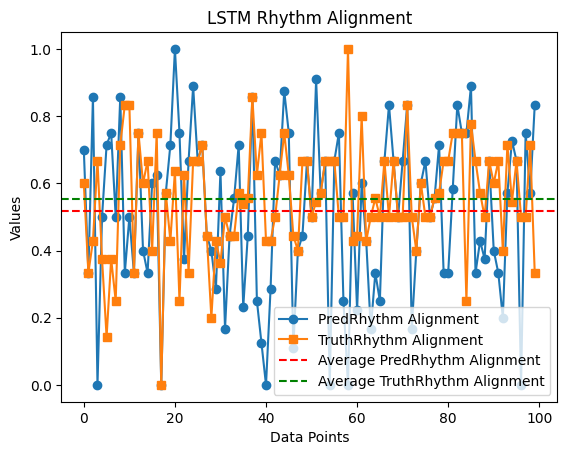

Average of Pred 0.08888429660807741
Average of True 0.14510286238696893


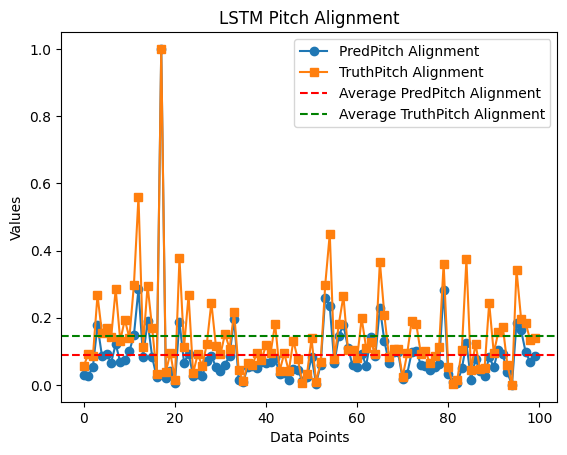

Average of Pred 0.3034358212977117
Average of True 0.3496863795784329


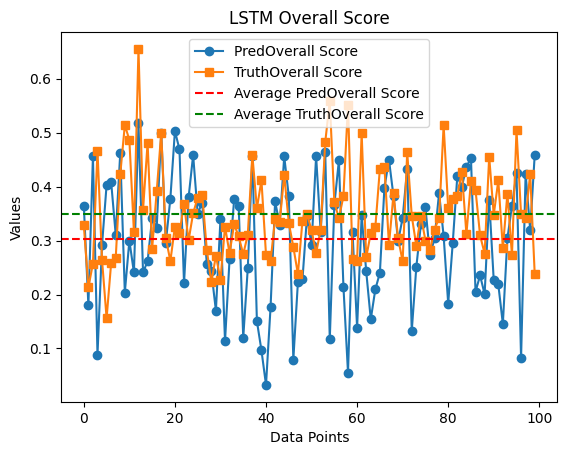

In [18]:

predScores,trueScores = [],[]
lyricResult = []
for i in range(len(test)):
  print('Generation:',i)
  original = truth[i]
  melody = test[i]
  lyrics = generate_lyrics(model, melody)
  for m in range(len(melody)):
    melody[m]['text'] = lyrics[m]

  predScores.append(evaluate_lyrics_alignment(melody))
  trueScores.append(evaluate_lyrics_alignment(original))

predPlot, truePlot = [[],[],[]], [[],[],[]]
for i in range(len(predScores)):
  predPlot[0].append(predScores[i]['Rhythm Alignment Score'])
  predPlot[1].append(predScores[i]['Pitch Alignment Score'])
  truePlot[0].append(trueScores[i]['Rhythm Alignment Score'])
  truePlot[1].append(trueScores[i]['Pitch Alignment Score'])
pred_scaled_scores0 = min_max_scaling(predPlot[0], 0, 1)
pred_scaled_scores1 = min_max_scaling(predPlot[1], 0, 1)
pred_combined_scores = [(s1 + s2) / 2 for s1, s2 in zip(pred_scaled_scores0, pred_scaled_scores1)]
true_scaled_scores0 = min_max_scaling(truePlot[0], 0, 1)
true_scaled_scores1 = min_max_scaling(truePlot[1], 0, 1)
true_combined_scores = [(s1 + s2) / 2 for s1, s2 in zip(true_scaled_scores0, true_scaled_scores1)]
alignment_plot(pred_scaled_scores0,true_scaled_scores0,'Rhythm Alignment')
alignment_plot(pred_scaled_scores1,true_scaled_scores1,'Pitch Alignment')
alignment_plot(pred_combined_scores,true_combined_scores,'Overall Score')
